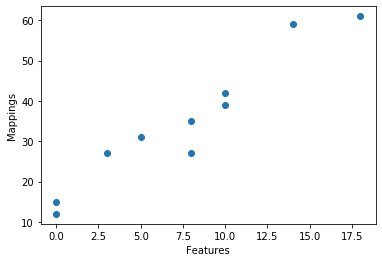

In [2]:
import numpy as np
from matplotlib import pyplot as plt

FRAME_LENGTH = 10

def prepareData(frames):
    return np.random.randint(20, size=frames)

def scatter(X, y):
    plt.scatter(X, y)
    plt.xlabel("Features")
    plt.ylabel("Mappings")
    plt.show()

def plot_fit_line(X, y, y_pred):
    plt.plot(X, y_pred, c="r")
    plt.scatter(X, y, c="b")
    plt.xlabel("Features")
    plt.ylabel("Mapping")
    plt.show()

X = prepareData(FRAME_LENGTH)
y = 2 + 3*X + np.random.randint(20, size=FRAME_LENGTH)

scatter(X, y)



    r: 0.11289613731337768
    R2: 0.9271030796174575
    b0: 14.296977660972402
    b1: 2.697766097240473
    SS_res: 174.1944809461236
    SS_tot: 2389.6000000000004


+----+----+--------------------+
| X  | y  |       y_pred       |
+----+----+--------------------+
| 18 | 61 | 62.85676741130092  |
| 8  | 35 | 35.87910643889619  |
| 14 | 59 | 52.06570302233902  |
| 10 | 39 | 41.27463863337714  |
| 10 | 42 | 41.27463863337714  |
| 3  | 27 | 22.39027595269382  |
| 0  | 12 | 14.296977660972402 |
| 8  | 27 | 35.87910643889619  |
| 5  | 31 | 27.78580814717477  |
| 0  | 15 | 14.296977660972402 |
+----+----+--------------------+


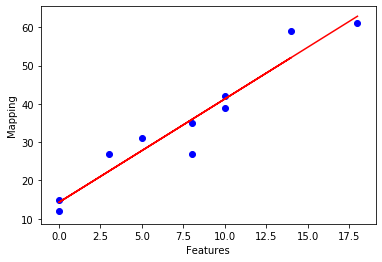

In [6]:
# from tabulate import tabulate
from prettytable import PrettyTable

def sumOfSquares(y1, y2):
    S = 0
    if type(y2) is float:
        for i in range(np.size(y1)):
            diff_square = (y1[i] - y2) ** 2
            S += diff_square
        return S
    else:
        for i in range(np.size(y1)):
            diff_square = (y1[i] - y2[i]) ** 2
            S += diff_square
        return S
            
def estimate_parameters(X, y):
    
    X_mean, y_mean = float(np.mean(X)), float(np.mean(y))
    
    n = np.size(X)
    S1 = 0
    S2 = 0
    
    _X, _y = (X - X_mean), (y - y_mean)
    S1 = np.sum(_X * _y)
    S2 = np.sum(_X * _X)

    b1 = S1 / S2
    b0 = y_mean - (b1 * X_mean)
    return (b0, b1)

b0, b1 = estimate_parameters(X, y)

y_pred = b0 + X * b1
y_mean = float(np.mean(y))
X_mean = float(np.mean(X))

SS_res = sumOfSquares(y, y_pred)
SS_tot = sumOfSquares(y, y_mean)

R2 = 1.0 - (SS_res / SS_tot) # R2 (Coefficient of Determination) determined by 1 - (SS_res / SS_tot)

var_X = np.var(X)
var_y = np.var(y)

SS_xy = np.sum((X - X_mean) * (y - y_mean))

r_deg_correlation = SS_xy / (var_X * var_y) # Degree of correlation defined as SS_xy / (var(X) * var(Y))

print('''

    r: {}
    R2: {}
    b0: {}
    b1: {}
    SS_res: {}
    SS_tot: {}

'''.format(r_deg_correlation, R2, b0, b1, SS_res, SS_tot))

table = PrettyTable(['X', 'y', 'y_pred'])
for i in range(len(X)):
    table.add_row([str(X[i]), str(y[i]), str(y_pred[i])])

print(table)

plot_fit_line(X, y, y_pred)
